In [70]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog, playercareerstats
import matplotlib.pyplot as plt
import numpy as np

In [71]:
active_players = players.get_active_players()
player_dict = {player['id']: player['full_name'] for player in active_players}

In [ ]:
all_fga = []
all_ts = []
fga_by_player = {}
ts_by_player = {}
fga_sd = {}
ts_sd = {}
total = 0

for player_id in player_dict.keys():

    pg_stats = playercareerstats.PlayerCareerStats(player_id=player_id, per_mode36="PerGame").get_data_frames()[0]
    
    # collects the players who meet a points per game and games played threshold from the most recent season
    if pg_stats.empty:
        continue
    if pg_stats['FGA'].iloc[-1] < 11.2 or pg_stats['GP'].iloc[-1] < 32:
        continue
    
    total += 1
    player_fga = []
    player_ts = []
    player_name = player_dict[player_id]
    print(str(total) + ": " + player_name)
    
    # compiles data for the graph containing the fga rate and ts% for each game of the players
    game_log = playergamelog.PlayerGameLog(player_id=player_id, season='2023-24', season_type_all_star='Regular Season').get_data_frames()[0]
    
    for _, game in game_log.iterrows():
        minutes = game['MIN']
        if minutes < 15:
            continue
        fga = game['FGA']
        all_fga.append(fga/minutes)
        player_fga.append(fga/minutes)
        
        denominator = 2 * (fga + 0.44 * game['FTA'])
        if denominator == 0:
            ts = 100
        else:
            ts = 100 * (game['PTS'] / denominator)
        
        all_ts.append(ts)
        player_ts.append(ts)

    fga_by_player[player_name] = player_fga
    ts_by_player[player_name] = player_ts
    fga_sd[player_name] = [np.std(player_fga)]
    ts_sd[player_name] = [np.std(player_ts)]

1: Bam Adebayo
2: Giannis Antetokounmpo
3: OG Anunoby
4: Deandre Ayton
5: Paolo Banchero
6: Desmond Bane
7: Scottie Barnes
8: RJ Barrett
9: Bradley Beal
10: Bogdan Bogdanovic
11: Bojan Bogdanovic
12: Devin Booker
13: Mikal Bridges
14: Miles Bridges
15: Malcolm Brogdon
16: Jaylen Brown
17: Jalen Brunson
18: Jimmy Butler
19: Jordan Clarkson
20: Cade Cunningham
21: Stephen Curry
22: Anthony Davis
23: DeMar DeRozan
24: Donte DiVincenzo
25: Luka Doncic
26: Kevin Durant
27: Anthony Edwards
28: Joel Embiid
29: De'Aaron Fox
30: Darius Garland
31: Paul George
32: Shai Gilgeous-Alexander
33: Jerami Grant
34: Jalen Green
35: Tyrese Haliburton
36: Tim Hardaway Jr.
37: James Harden
38: Tobias Harris
39: Scoot Henderson
40: Tyler Herro
41: Chet Holmgren
42: De'Andre Hunter
43: Brandon Ingram
44: Kyrie Irving
45: Jaden Ivey
46: GG Jackson II
47: Jaren Jackson Jr.
48: LeBron James
49: Jalen Johnson
50: Keldon Johnson
51: Nikola Jokic
52: Jonathan Kuminga
53: Kyle Kuzma
54: Caris LeVert
55: Kawhi Leona

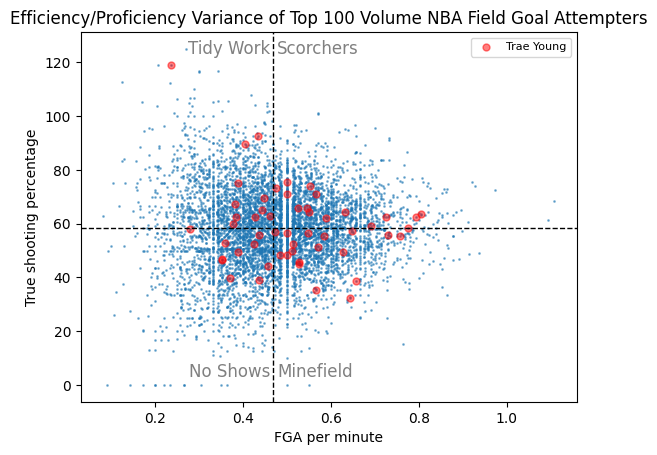

In [242]:
fga_median = np.median(all_fga)
ts_median = np.median(all_ts)
plt.scatter(all_fga, all_ts, s=1, alpha=0.5)
plot_player = "Trae Young"
plt.scatter(fga_by_player[plot_player], ts_by_player[plot_player], s=25, alpha=0.5, color='red', label=plot_player)
plt.legend(fontsize=8)
plt.axvline(fga_median, color='black', linestyle='--', linewidth=1)
plt.axhline(ts_median, color='black', linestyle='--', linewidth=1)
plt.text(fga_median - .005, ts_median + 65, 'Tidy Work', ha='right', color='grey', fontsize=12)
plt.text(fga_median + .01, ts_median + 65, 'Scorchers', ha='left', color='grey', fontsize=12)
plt.text(fga_median - .005, ts_median - 55, 'No Shows', ha='right', color='grey', fontsize=12)
plt.text(fga_median + .01, ts_median - 55, 'Minefield', ha='left', color='grey', fontsize=12)
plt.title("Efficiency/Proficiency Variance of Top 100 Volume NBA Field Goal Attempters")
plt.xlabel("FGA per minute")
plt.ylabel("True shooting percentage")
plt.show()
